In [1]:
import requests

# Replace 'YOUR_GITHUB_TOKEN' with your actual token
TOKEN = ''# removed the PAT for secuity purpose
HEADERS = {'Authorization': f'token {TOKEN}'}

def test_connection():
    # Fetch the GitHub rate limit endpoint
    url = "https://api.github.com/rate_limit"
    response = requests.get(url, headers=HEADERS)

    # Check if the request was successful
    if response.status_code == 200:
        print("Connection successful!")
        print("Rate limit information:")
        print(response.json())
    else:
        print("Connection failed.")
        print("Status code:", response.status_code)
        print("Response:", response.json())

# Run the connection test
test_connection()


Connection successful!
Rate limit information:
{'resources': {'core': {'limit': 5000, 'used': 0, 'remaining': 5000, 'reset': 1730263422}, 'search': {'limit': 30, 'used': 0, 'remaining': 30, 'reset': 1730259882}, 'graphql': {'limit': 5000, 'used': 0, 'remaining': 5000, 'reset': 1730263422}, 'integration_manifest': {'limit': 5000, 'used': 0, 'remaining': 5000, 'reset': 1730263422}, 'source_import': {'limit': 100, 'used': 0, 'remaining': 100, 'reset': 1730259882}, 'code_scanning_upload': {'limit': 1000, 'used': 0, 'remaining': 1000, 'reset': 1730263422}, 'actions_runner_registration': {'limit': 10000, 'used': 0, 'remaining': 10000, 'reset': 1730263422}, 'scim': {'limit': 15000, 'used': 0, 'remaining': 15000, 'reset': 1730263422}, 'dependency_snapshots': {'limit': 100, 'used': 0, 'remaining': 100, 'reset': 1730259882}, 'audit_log': {'limit': 1750, 'used': 0, 'remaining': 1750, 'reset': 1730263422}, 'audit_log_streaming': {'limit': 15, 'used': 0, 'remaining': 15, 'reset': 1730263422}, 'code

In [2]:
import pandas as pd

def fetch_boston_users():
    users = []
    url = "https://api.github.com/search/users?q=location:Boston+followers:>100&per_page=30"
    while url:
        response = requests.get(url, headers=HEADERS)
        if response.status_code != 200:
            print("Error:", response.status_code)
            break

        data = response.json()
        users.extend(data['items'])

        # Check if there’s a next page in pagination
        if 'next' in response.links:
            url = response.links['next']['url']
        else:
            url = None  # No more pages

    # Convert to DataFrame for easier manipulation
    users_df = pd.DataFrame(users)
    return users_df

# Fetch and preview the data
users_df = fetch_boston_users()
users_df.head()


,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,user_view_type,site_admin,score
0,brianyu28,16066224,MDQ6VXNlcjE2MDY2MjI0,https://avatars.githubusercontent.com/u/160662...,,https://api.github.com/users/brianyu28,https://github.com/brianyu28,https://api.github.com/users/brianyu28/followers,https://api.github.com/users/brianyu28/followi...,https://api.github.com/users/brianyu28/gists{/...,https://api.github.com/users/brianyu28/starred...,https://api.github.com/users/brianyu28/subscri...,https://api.github.com/users/brianyu28/orgs,https://api.github.com/users/brianyu28/repos,https://api.github.com/users/brianyu28/events{...,https://api.github.com/users/brianyu28/receive...,User,public,False,1.0
1,PatrickAlphaC,54278053,MDQ6VXNlcjU0Mjc4MDUz,https://avatars.githubusercontent.com/u/542780...,,https://api.github.com/users/PatrickAlphaC,https://github.com/PatrickAlphaC,https://api.github.com/users/PatrickAlphaC/fol...,https://api.github.com/users/PatrickAlphaC/fol...,https://api.github.com/users/PatrickAlphaC/gis...,https://api.github.com/users/PatrickAlphaC/sta...,https://api.github.com/users/PatrickAlphaC/sub...,https://api.github.com/users/PatrickAlphaC/orgs,https://api.github.com/users/PatrickAlphaC/repos,https://api.github.com/users/PatrickAlphaC/eve...,https://api.github.com/users/PatrickAlphaC/rec...,User,public,False,1.0
2,KeithGalli,6260748,MDQ6VXNlcjYyNjA3NDg=,https://avatars.githubusercontent.com/u/626074...,,https://api.github.com/users/KeithGalli,https://github.com/KeithGalli,https://api.github.com/users/KeithGalli/followers,https://api.github.com/users/KeithGalli/follow...,https://api.github.com/users/KeithGalli/gists{...,https://api.github.com/users/KeithGalli/starre...,https://api.github.com/users/KeithGalli/subscr...,https://api.github.com/users/KeithGalli/orgs,https://api.github.com/users/KeithGalli/repos,https://api.github.com/users/KeithGalli/events...,https://api.github.com/users/KeithGalli/receiv...,User,public,False,1.0
3,CharlesCreativeContent,62077627,MDQ6VXNlcjYyMDc3NjI3,https://avatars.githubusercontent.com/u/620776...,,https://api.github.com/users/CharlesCreativeCo...,https://github.com/CharlesCreativeContent,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,https://api.github.com/users/CharlesCreativeCo...,User,public,False,1.0
4,timbl,1254848,MDQ6VXNlcjEyNTQ4NDg=,https://avatars.githubusercontent.com/u/125484...,,https://api.github.com/users/timbl,https://github.com/timbl,https://api.github.com/users/timbl/followers,https://api.github.com/users/timbl/following{/...,https://api.github.com/users/timbl/gists{/gist...,https://api.github.com/users/timbl/starred{/ow...,https://api.github.com/users/timbl/subscriptions,https://api.github.com/users/timbl/orgs,https://api.github.com/users/timbl/repos,https://api.github.com/users/timbl/events{/pri...,https://api.github.com/users/timbl/received_ev...,User,public,False,1.0


In [4]:
def clean_company(company):
    """Clean up the company name by stripping whitespace, removing '@' and converting to uppercase."""
    if company:
        company = company.strip().lstrip('@').upper()
    return company or ''

def fetch_user_details(username):
    """Fetch detailed information for a single user by username."""
    url = f"https://api.github.com/users/{username}"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        data = response.json()
        # Organize relevant data fields
        user_info = {
            'login': data.get('login', ''),
            'name': data.get('name', ''),
            'company': clean_company(data.get('company', '')),
            'location': data.get('location', ''),
            'email': data.get('email', ''),
            'hireable': data.get('hireable', ''),
            'bio': data.get('bio', ''),
            'public_repos': data.get('public_repos', 0),
            'followers': data.get('followers', 0),
            'following': data.get('following', 0),
            'created_at': data.get('created_at', '')
        }
        return user_info
    else:
        print(f"Failed to fetch details for user {username}: {response.status_code}")
        return None

# Fetch detailed data for each user in the original list
detailed_users = [fetch_user_details(user['login']) for user in users_df.to_dict('records')]

# Filter out any None values (in case of failed requests) and convert to DataFrame
detailed_users = [user for user in detailed_users if user]
detailed_users_df = pd.DataFrame(detailed_users)

# Preview the cleaned and detailed user data
detailed_users_df.head()


,login,name,company,location,email,hireable,bio,public_repos,followers,following,created_at
0,brianyu28,Brian Yu,,"Boston, MA",brian@brianyu.me,None,Software developer and educator,35,13202,13,2015-11-29T07:25:29Z
1,PatrickAlphaC,Patrick Collins,CYFRIN,Boston,None,None,"Smart Contract Engineer, Auditor, and Educator",272,9665,43,2019-08-19T14:13:41Z
2,KeithGalli,Keith Galli,,"Boston, MA",None,True,YouTube Content Creator :).,53,5680,1,2013-12-25T19:49:26Z
3,CharlesCreativeContent,Shawn Charles,AMAZON,"Boston, MA",None,True,Software Engineer building Tech Communities,83,5055,1092,2020-03-11T20:10:11Z
4,timbl,Tim Berners-Lee,INRUPT,Boston MA USA,timbl@w3.org,None,None,18,4850,69,2011-12-11T01:28:03Z


In [6]:
# Convert boolean columns and null values to the specified format
detailed_users_df = detailed_users_df.fillna('')  # Replace NaN with empty strings
detailed_users_df['hireable'] = detailed_users_df['hireable'].apply(lambda x: 'true' if x else 'false')

# Save to CSV
detailed_users_df.to_csv('users.csv', index=False)
print("users.csv has been saved successfully.")


users.csv has been saved successfully.


In [7]:
def fetch_user_repositories(username):
    """Fetch up to 500 most recently pushed repositories for a user."""
    url = f"https://api.github.com/users/{username}/repos?sort=pushed&per_page=100"
    repos = []
    while url and len(repos) < 500:
        response = requests.get(url, headers=HEADERS)
        if response.status_code != 200:
            print(f"Failed to fetch repos for {username}: {response.status_code}")
            break
        data = response.json()
        repos.extend(data)

        # Check if there's a next page
        if 'next' in response.links:
            url = response.links['next']['url']
        else:
            url = None

    # Extract relevant repo data
    repo_details = []
    for repo in repos[:500]:  # Limit to 500
        repo_details.append({
            'login': username,
            'full_name': repo.get('full_name', ''),
            'created_at': repo.get('created_at', ''),
            'stargazers_count': repo.get('stargazers_count', 0),
            'watchers_count': repo.get('watchers_count', 0),
            'language': repo.get('language', ''),
            'has_projects': 'true' if repo.get('has_projects') else 'false',
            'has_wiki': 'true' if repo.get('has_wiki') else 'false',
            'license_name': repo['license']['key'] if repo.get('license') else ''
        })
    return repo_details

# Fetch repository data for each user and compile it
all_repos = []
for username in detailed_users_df['login']:
    all_repos.extend(fetch_user_repositories(username))

# Convert to DataFrame and save to CSV
repos_df = pd.DataFrame(all_repos)
repos_df.to_csv('repositories.csv', index=False)
print("repositories.csv has been saved successfully.")


repositories.csv has been saved successfully.


In [8]:
import pandas as pd

# Load data from CSV files
users_df = pd.read_csv('users.csv')
repos_df = pd.read_csv('repositories.csv')


In [9]:
# Summary of users
print(users_df.describe())

# Top 5 users with the most followers
top_followers = users_df.nlargest(5, 'followers')[['login', 'name', 'followers']]
print("Top 5 Users by Followers:")
print(top_followers)


       public_repos     followers    following
count    469.000000    469.000000   469.000000
mean      98.518124    446.415778    90.893390
std      143.029681   1012.727465   270.641114
min        0.000000    101.000000     0.000000
25%       28.000000    131.000000     2.000000
50%       58.000000    184.000000    16.000000
75%      122.000000    344.000000    70.000000
max     1534.000000  13202.000000  2912.000000
Top 5 Users by Followers:
                    login             name  followers
0               brianyu28         Brian Yu      13202
1           PatrickAlphaC  Patrick Collins       9665
2              KeithGalli      Keith Galli       5680
3  CharlesCreativeContent    Shawn Charles       5055
4                   timbl  Tim Berners-Lee       4850


In [10]:
# Top 5 companies by number of users
top_companies = users_df['company'].value_counts().head(5)
print("Top Companies:")
print(top_companies)


Top Companies:
company
NORTHEASTERN UNIVERSITY    16
GOOGLE                     12
MICROSOFT                  10
MIT                        10
BOSTON UNIVERSITY           9
Name: count, dtype: int64


In [19]:
# Language distribution
language_counts = repos_df['language'].value_counts()
print("Top Programming Languages:")
# print(language_counts.head(50))
print(language_counts.head(10))

Top Programming Languages:
language
JavaScript    7693
Python        4692
HTML          1834
Ruby          1592
Java          1297
TypeScript    1166
C#            1064
C              992
C++            990
Shell          980
Name: count, dtype: int64


In [12]:
# Top 5 most starred repositories
top_starred_repos = repos_df.nlargest(5, 'stargazers_count')[['full_name', 'stargazers_count', 'language']]
print("Top 5 Most Starred Repositories:")
print(top_starred_repos)


Top 5 Most Starred Repositories:
                         full_name  stargazers_count    language
3077   rapid7/metasploit-framework             34080        Ruby
1156         rwaldron/idiomatic.js             24796         NaN
3720              processing/p5.js             21636  JavaScript
13943         quozd/awesome-dotnet             19279         NaN
3377            quantopian/zipline             17655      Python


In [20]:
# Count of repos with wiki and projects enabled
wiki_count = repos_df['has_wiki'].value_counts()
projects_count = repos_df['has_projects'].value_counts()
print("Repositories with Wiki Enabled:", wiki_count)
print("Repositories with Projects Enabled:", projects_count)


Repositories with Wiki Enabled: has_wiki
True     36159
False     6335
Name: count, dtype: int64
Repositories with Projects Enabled: has_projects
True     41590
False      904
Name: count, dtype: int64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")


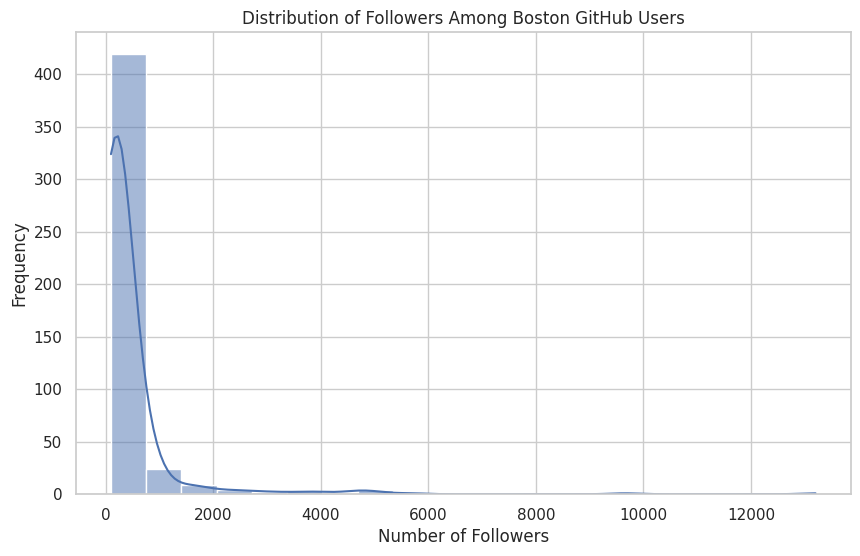

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(users_df['followers'], bins=20, kde=True)
plt.title("Distribution of Followers Among Boston GitHub Users")
plt.xlabel("Number of Followers")
plt.ylabel("Frequency")
plt.show()


<ipython-input-23-767cddf39c49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")


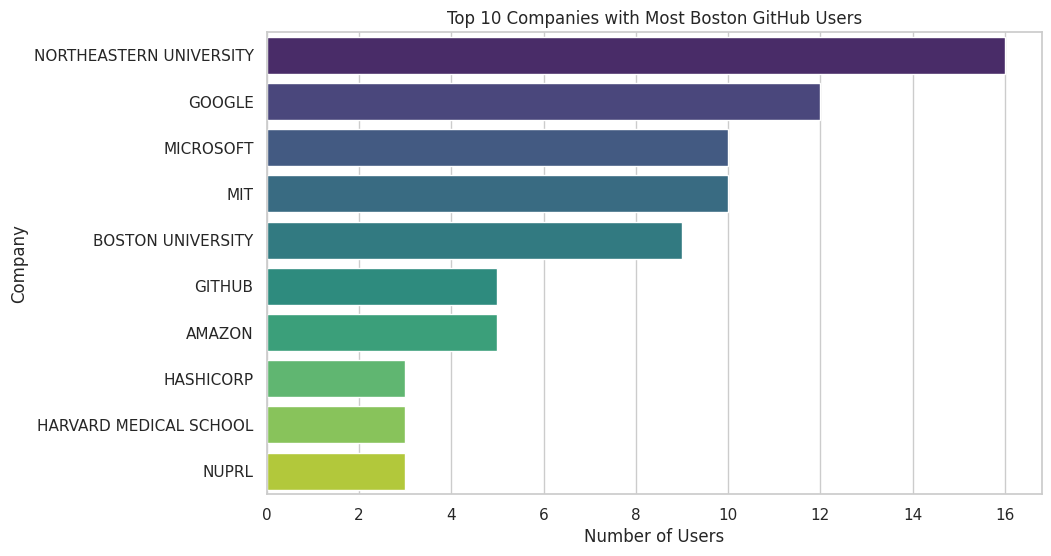

In [23]:
top_companies = users_df['company'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")
plt.title("Top 10 Companies with Most Boston GitHub Users")
plt.xlabel("Number of Users")
plt.ylabel("Company")
plt.show()


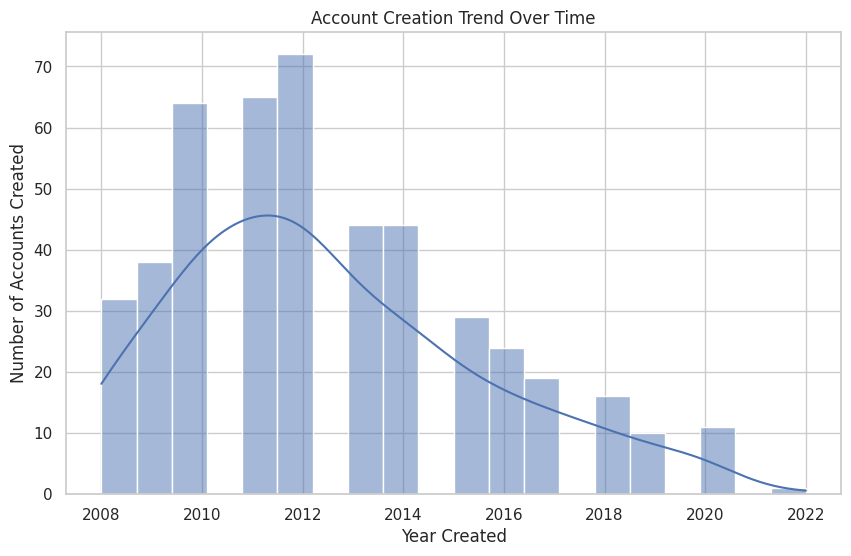

In [24]:
users_df['created_at'] = pd.to_datetime(users_df['created_at'])
users_df['year_created'] = users_df['created_at'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(users_df['year_created'], bins=20, kde=True)
plt.title("Account Creation Trend Over Time")
plt.xlabel("Year Created")
plt.ylabel("Number of Accounts Created")
plt.show()


<ipython-input-25-f65d94b53be4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette="coolwarm")


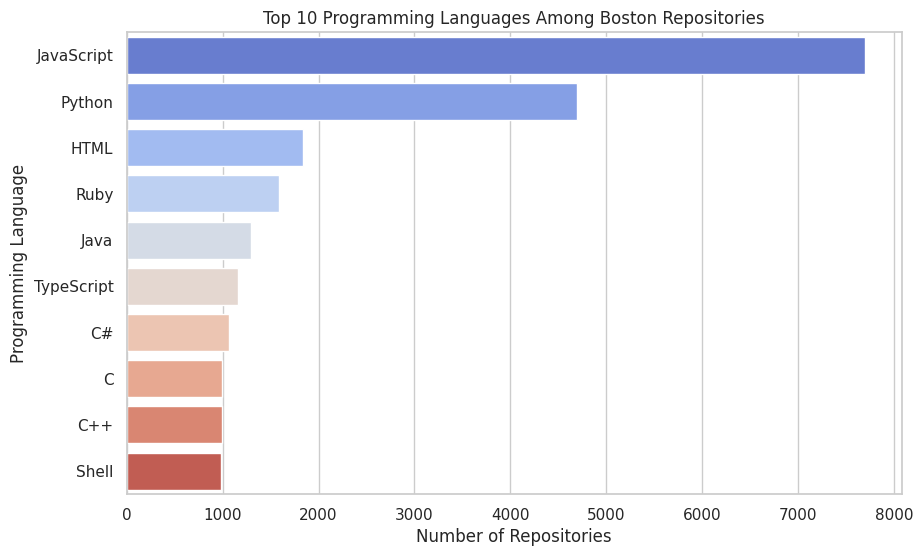

In [25]:
top_languages = repos_df['language'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.values, y=top_languages.index, palette="coolwarm")
plt.title("Top 10 Programming Languages Among Boston Repositories")
plt.xlabel("Number of Repositories")
plt.ylabel("Programming Language")
plt.show()


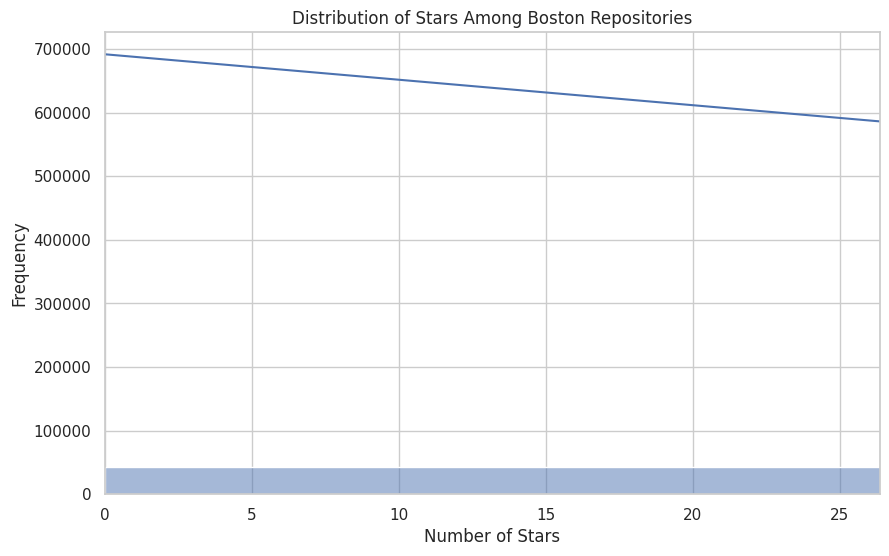

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(repos_df['stargazers_count'], bins=20, kde=True)
plt.title("Distribution of Stars Among Boston Repositories")
plt.xlabel("Number of Stars")
plt.ylabel("Frequency")
plt.xlim(0, repos_df['stargazers_count'].quantile(0.95))  # Focus on the 95th percentile
plt.show()


<ipython-input-27-31816db01a54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wiki_counts.index, y=wiki_counts.values, palette="magma")


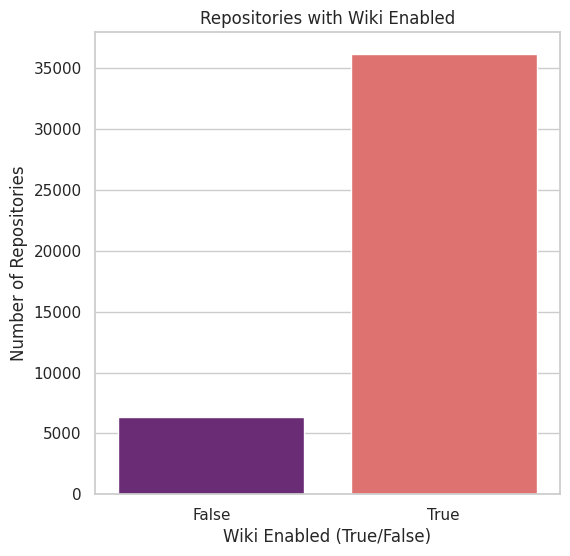

<ipython-input-27-31816db01a54>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=projects_counts.index, y=projects_counts.values, palette="inferno")


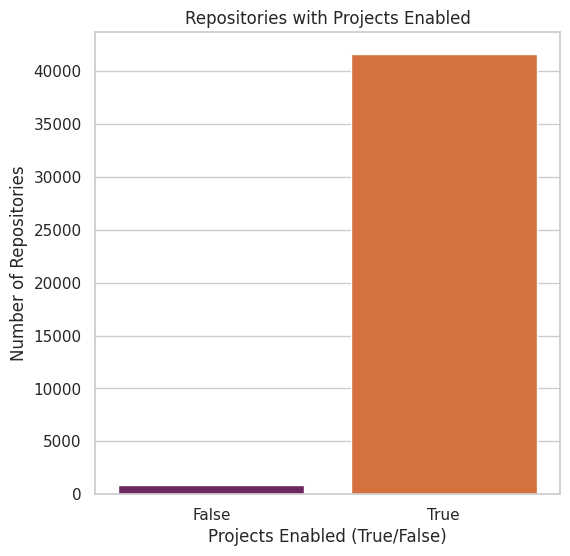

In [27]:
# Wiki enabled distribution
wiki_counts = repos_df['has_wiki'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=wiki_counts.index, y=wiki_counts.values, palette="magma")
plt.title("Repositories with Wiki Enabled")
plt.xlabel("Wiki Enabled (True/False)")
plt.ylabel("Number of Repositories")
plt.show()

# Projects enabled distribution
projects_counts = repos_df['has_projects'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=projects_counts.index, y=projects_counts.values, palette="inferno")
plt.title("Repositories with Projects Enabled")
plt.xlabel("Projects Enabled (True/False)")
plt.ylabel("Number of Repositories")
plt.show()


User Data Correlation Matrix:
              followers  following  public_repos
followers      1.000000   0.010277      0.168294
following      0.010277   1.000000      0.122654
public_repos   0.168294   0.122654      1.000000


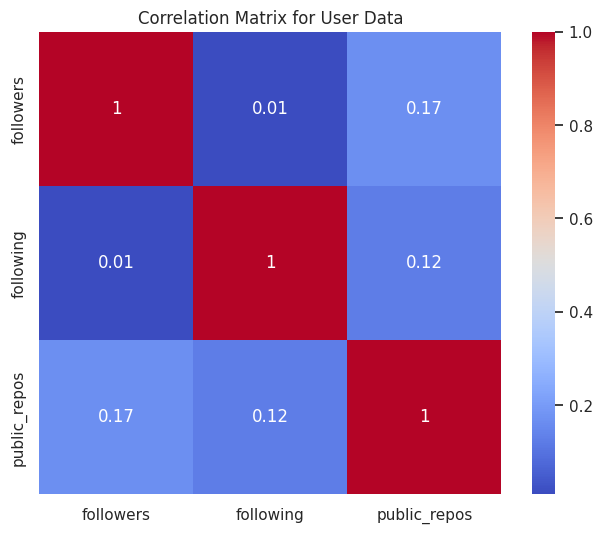

In [28]:
# Correlation matrix for user data
user_corr = users_df[['followers', 'following', 'public_repos']].corr()
print("User Data Correlation Matrix:")
print(user_corr)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(user_corr, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix for User Data")
plt.show()


Average Star Count per Language:
language
SQL              716.000000
RMarkdown        344.750000
Vim Script       318.500000
Nunjucks         133.636364
SystemVerilog    126.000000
Kotlin           118.197531
ATS               96.166667
C#                75.514098
Handlebars        70.400000
PowerShell        58.314286
Name: stargazers_count, dtype: float64


<ipython-input-29-17e10c4dea93>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_stars.head(10).values, y=language_stars.head(10).index, palette="viridis")


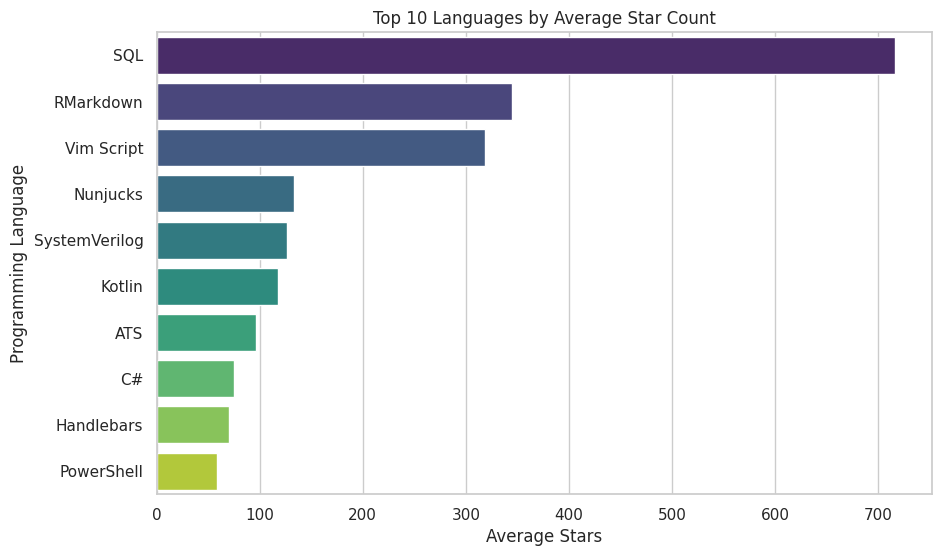

In [29]:
# Average star count per language
language_stars = repos_df.groupby('language')['stargazers_count'].mean().sort_values(ascending=False)

print("Average Star Count per Language:")
print(language_stars.head(10))

# Plot top 10 languages by average star count
plt.figure(figsize=(10, 6))
sns.barplot(x=language_stars.head(10).values, y=language_stars.head(10).index, palette="viridis")
plt.title("Top 10 Languages by Average Star Count")
plt.xlabel("Average Stars")
plt.ylabel("Programming Language")
plt.show()


Average Stars for Repos with/without Wiki Enabled:
has_wiki
False    26.292028
True     18.805581
Name: stargazers_count, dtype: float64


<ipython-input-30-8d25fff89c54>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wiki_star_counts.index, y=wiki_star_counts.values, palette="magma")


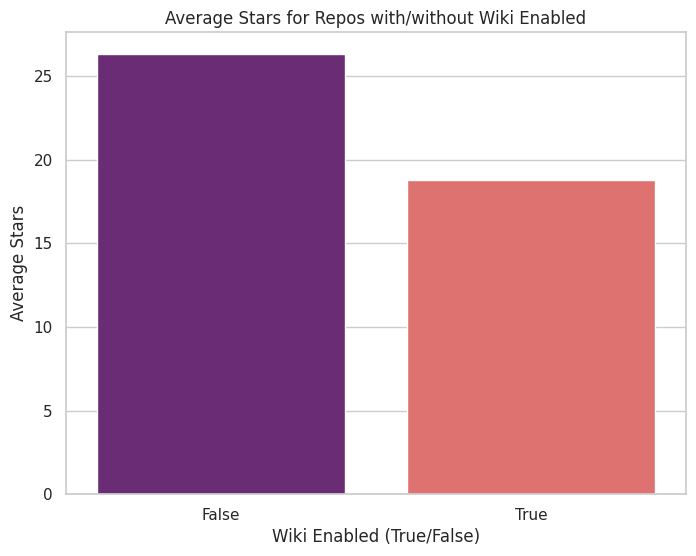

In [30]:
# Average stars for repos with and without wiki enabled
wiki_star_counts = repos_df.groupby('has_wiki')['stargazers_count'].mean()
print("Average Stars for Repos with/without Wiki Enabled:")
print(wiki_star_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=wiki_star_counts.index, y=wiki_star_counts.values, palette="magma")
plt.title("Average Stars for Repos with/without Wiki Enabled")
plt.xlabel("Wiki Enabled (True/False)")
plt.ylabel("Average Stars")
plt.show()


Average Stars for Repos with/without Projects Enabled:
has_projects
False    102.747788
True      18.121351
Name: stargazers_count, dtype: float64


<ipython-input-31-b9eca4665fdb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=projects_star_counts.index, y=projects_star_counts.values, palette="inferno")


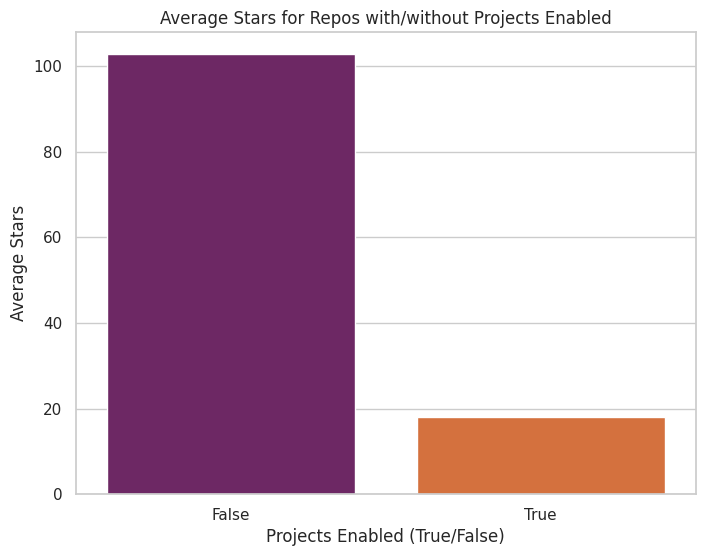

In [31]:
# Average stars for repos with and without projects enabled
projects_star_counts = repos_df.groupby('has_projects')['stargazers_count'].mean()
print("Average Stars for Repos with/without Projects Enabled:")
print(projects_star_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=projects_star_counts.index, y=projects_star_counts.values, palette="inferno")
plt.title("Average Stars for Repos with/without Projects Enabled")
plt.xlabel("Projects Enabled (True/False)")
plt.ylabel("Average Stars")
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert categorical data for modeling
repos_df['has_projects'] = repos_df['has_projects'].map({'true': 1, 'false': 0})
repos_df['has_wiki'] = repos_df['has_wiki'].map({'true': 1, 'false': 0})
repos_df = pd.get_dummies(repos_df, columns=['language'], drop_first=True)

# Define features and target
X = repos_df[['has_projects', 'has_wiki'] + [col for col in repos_df.columns if col.startswith('language_')]]
y = repos_df['stargazers_count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of the Model:", mse)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values